In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import glob as glob                                            # grabbing file names
import pandas as pd                                            # making dataframe for exporting parameters
import numpy as np                                             # basic math
import skimage.io as io                                        # reading in images
import os
import trackpy as tp             # particle tracking toolbox
%matplotlib notebook
import matplotlib.pyplot as plt  # for plotting everything
from matplotlib import cm, colors
from tcell_migration import *

# Parameters

In [2]:
feature_size = 11
minmass = 2500
separation = 3
max_search_range = 8
num_skipped_frames = 0
min_track_length = 5
frame_duration = 15
um_per_pixel = 1.1

In [3]:
filename = 'Position_1.tif'


In [4]:
#read in the imsage stack
imstack = io.imread(filename)


<IPython.core.display.Javascript object>


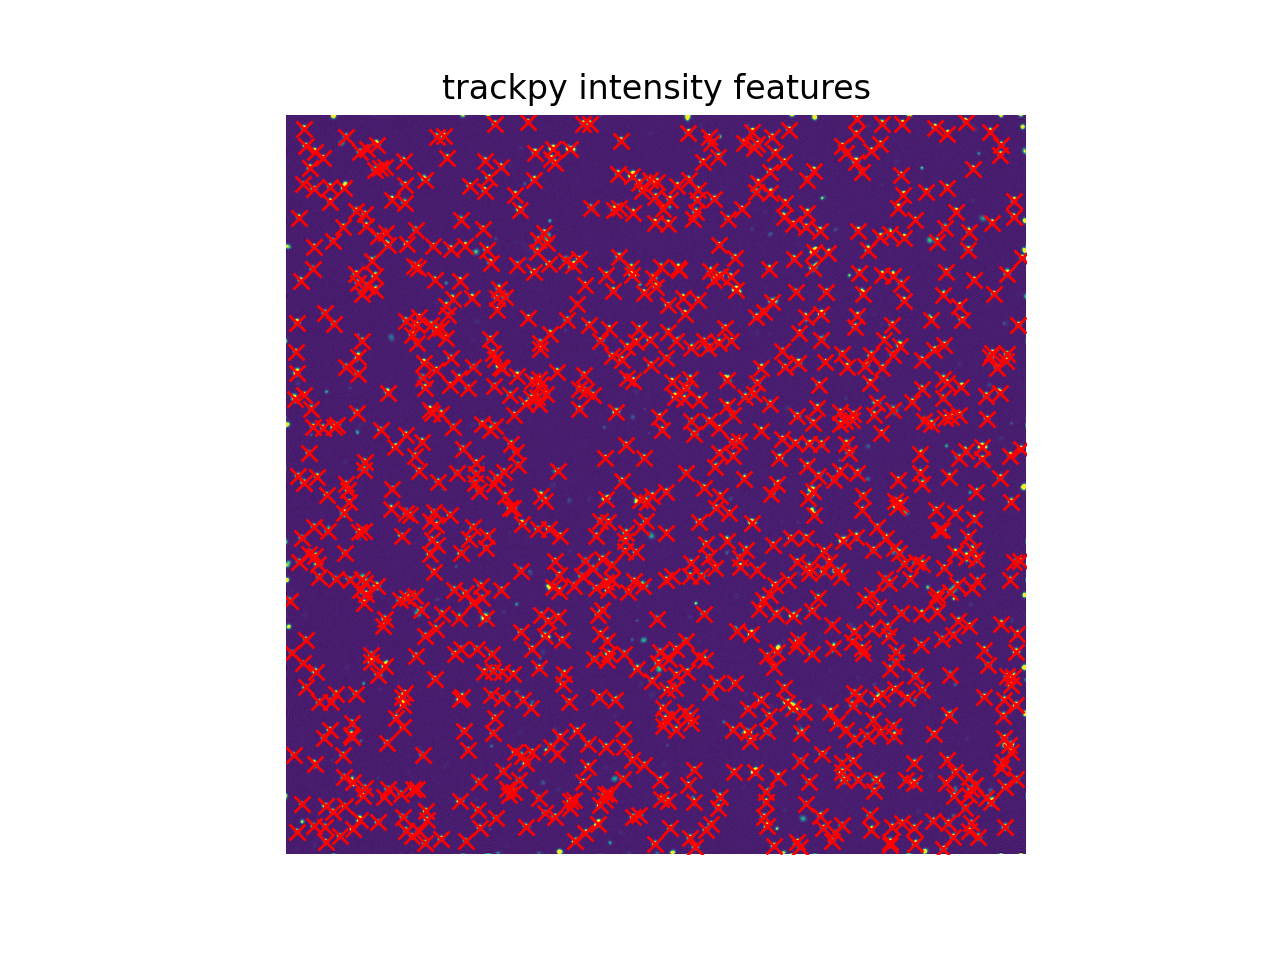

In [5]:
check_peak_locations(imstack, frame_num=50, im_min_inten=80, im_max_inten=350)

Frame 80: 978 features


<IPython.core.display.Javascript object>


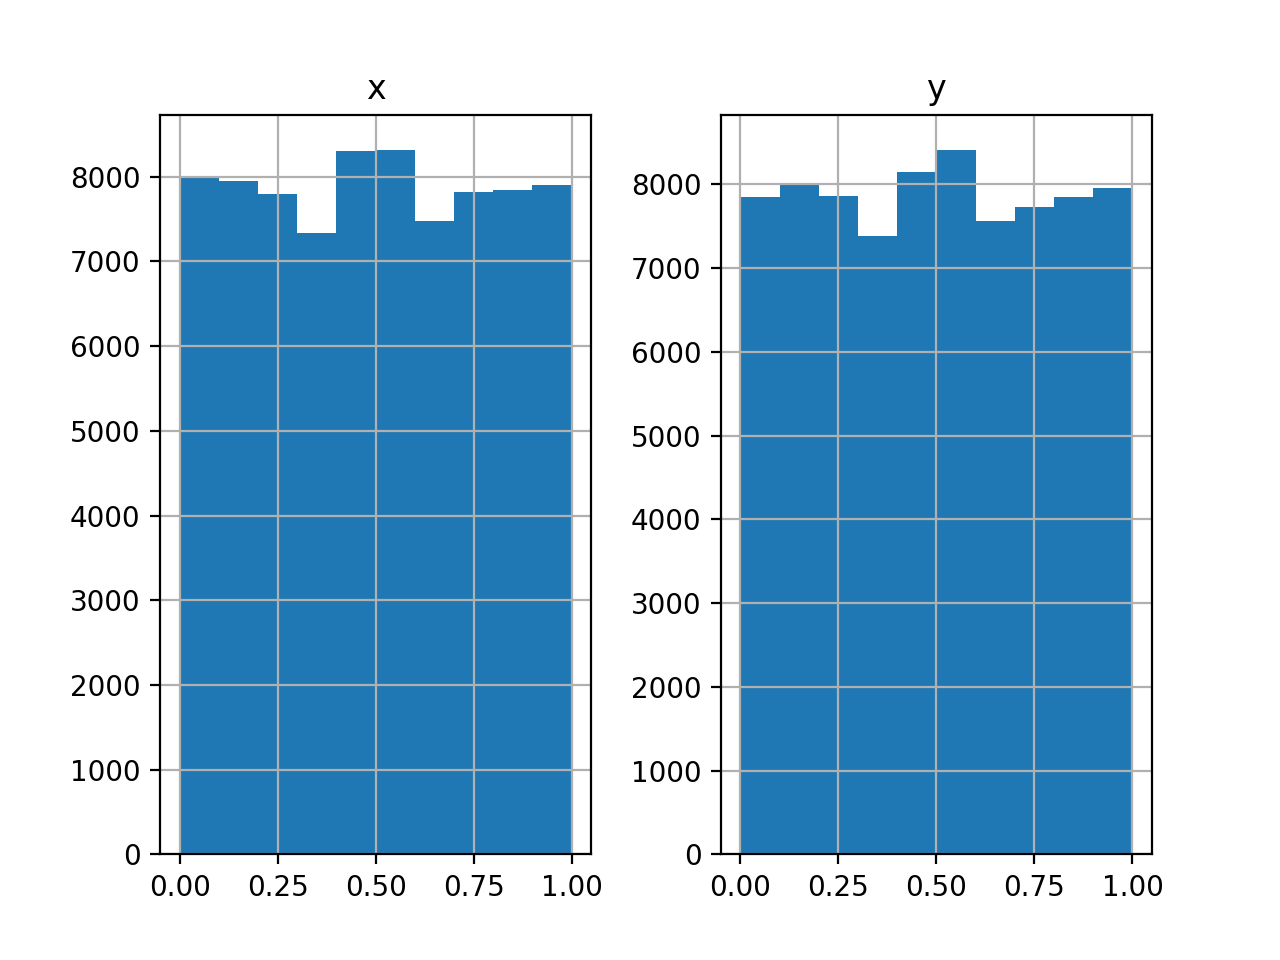

array([[<AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'y'}>]], dtype=object)

In [6]:
# find the peaks
all_cells = tp.batch(imstack[:], feature_size, minmass=minmass, separation = separation)

# check whether subpixel accuracy is decent. Should be relatively flat distribution
tp.subpx_bias(all_cells)

In [7]:
# link tracks
cell_tracks = tp.link_df(all_cells, search_range=max_search_range, adaptive_stop = 5, memory=num_skipped_frames)
# filter based on minimum length
cell_tracks_filtered = tp.filter_stubs(cell_tracks, min_track_length)


Frame 80: 978 trajectories present.


In [8]:
cell_trackdata_df = calculate_track_parameters(cell_tracks_filtered, frame_duration=frame_duration, um_per_pixel=um_per_pixel)

<IPython.core.display.Javascript object>


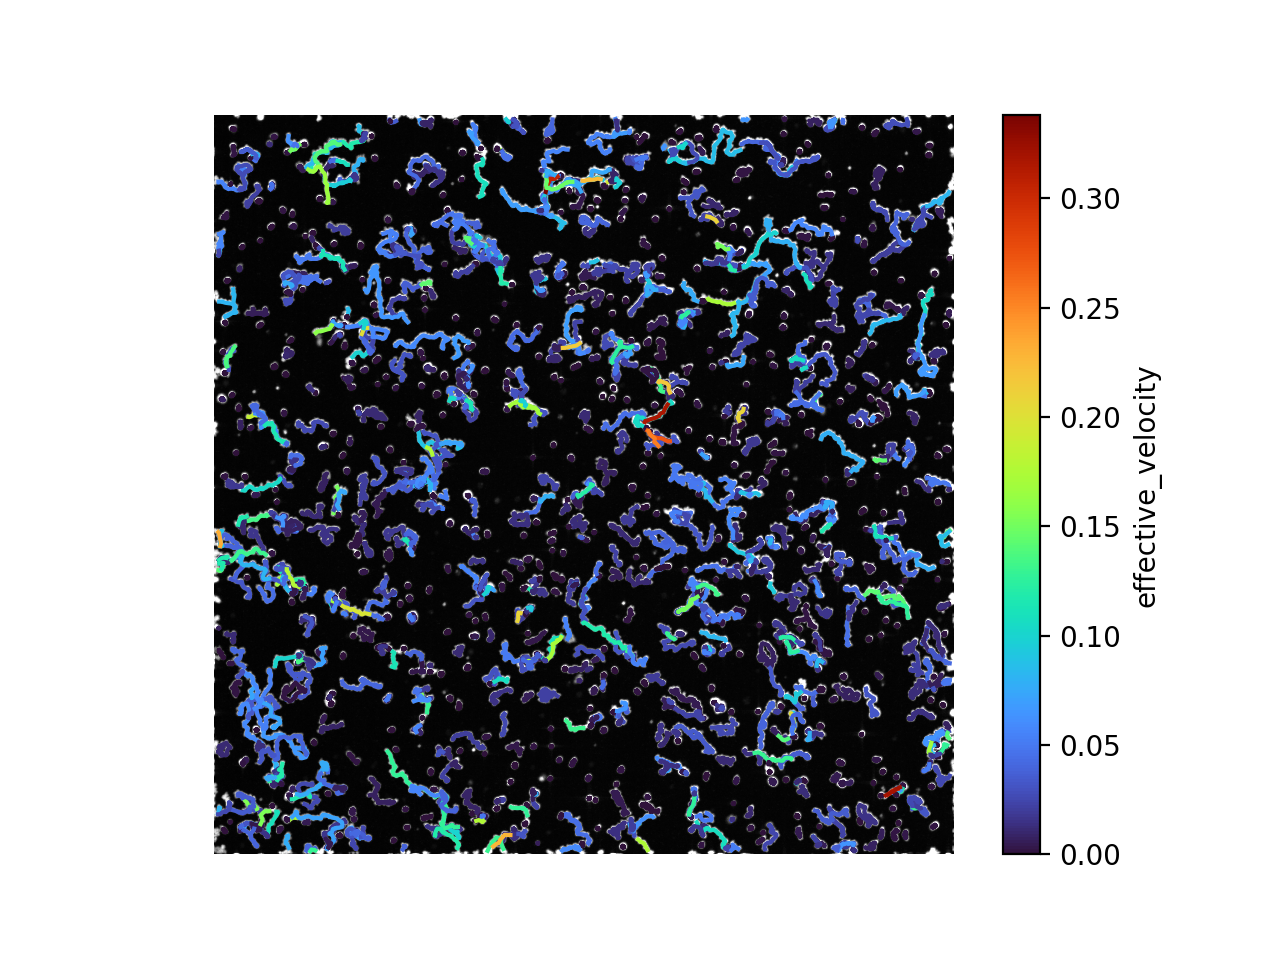

In [9]:
# plot tracks all the same color
# plot_track_overlays(imstack, cell_trackdata_df)

# plot tracks according to a dimension in the dataframe
plot_track_overlays(imstack, cell_trackdata_df, color_hue='effective_velocity')


<IPython.core.display.Javascript object>


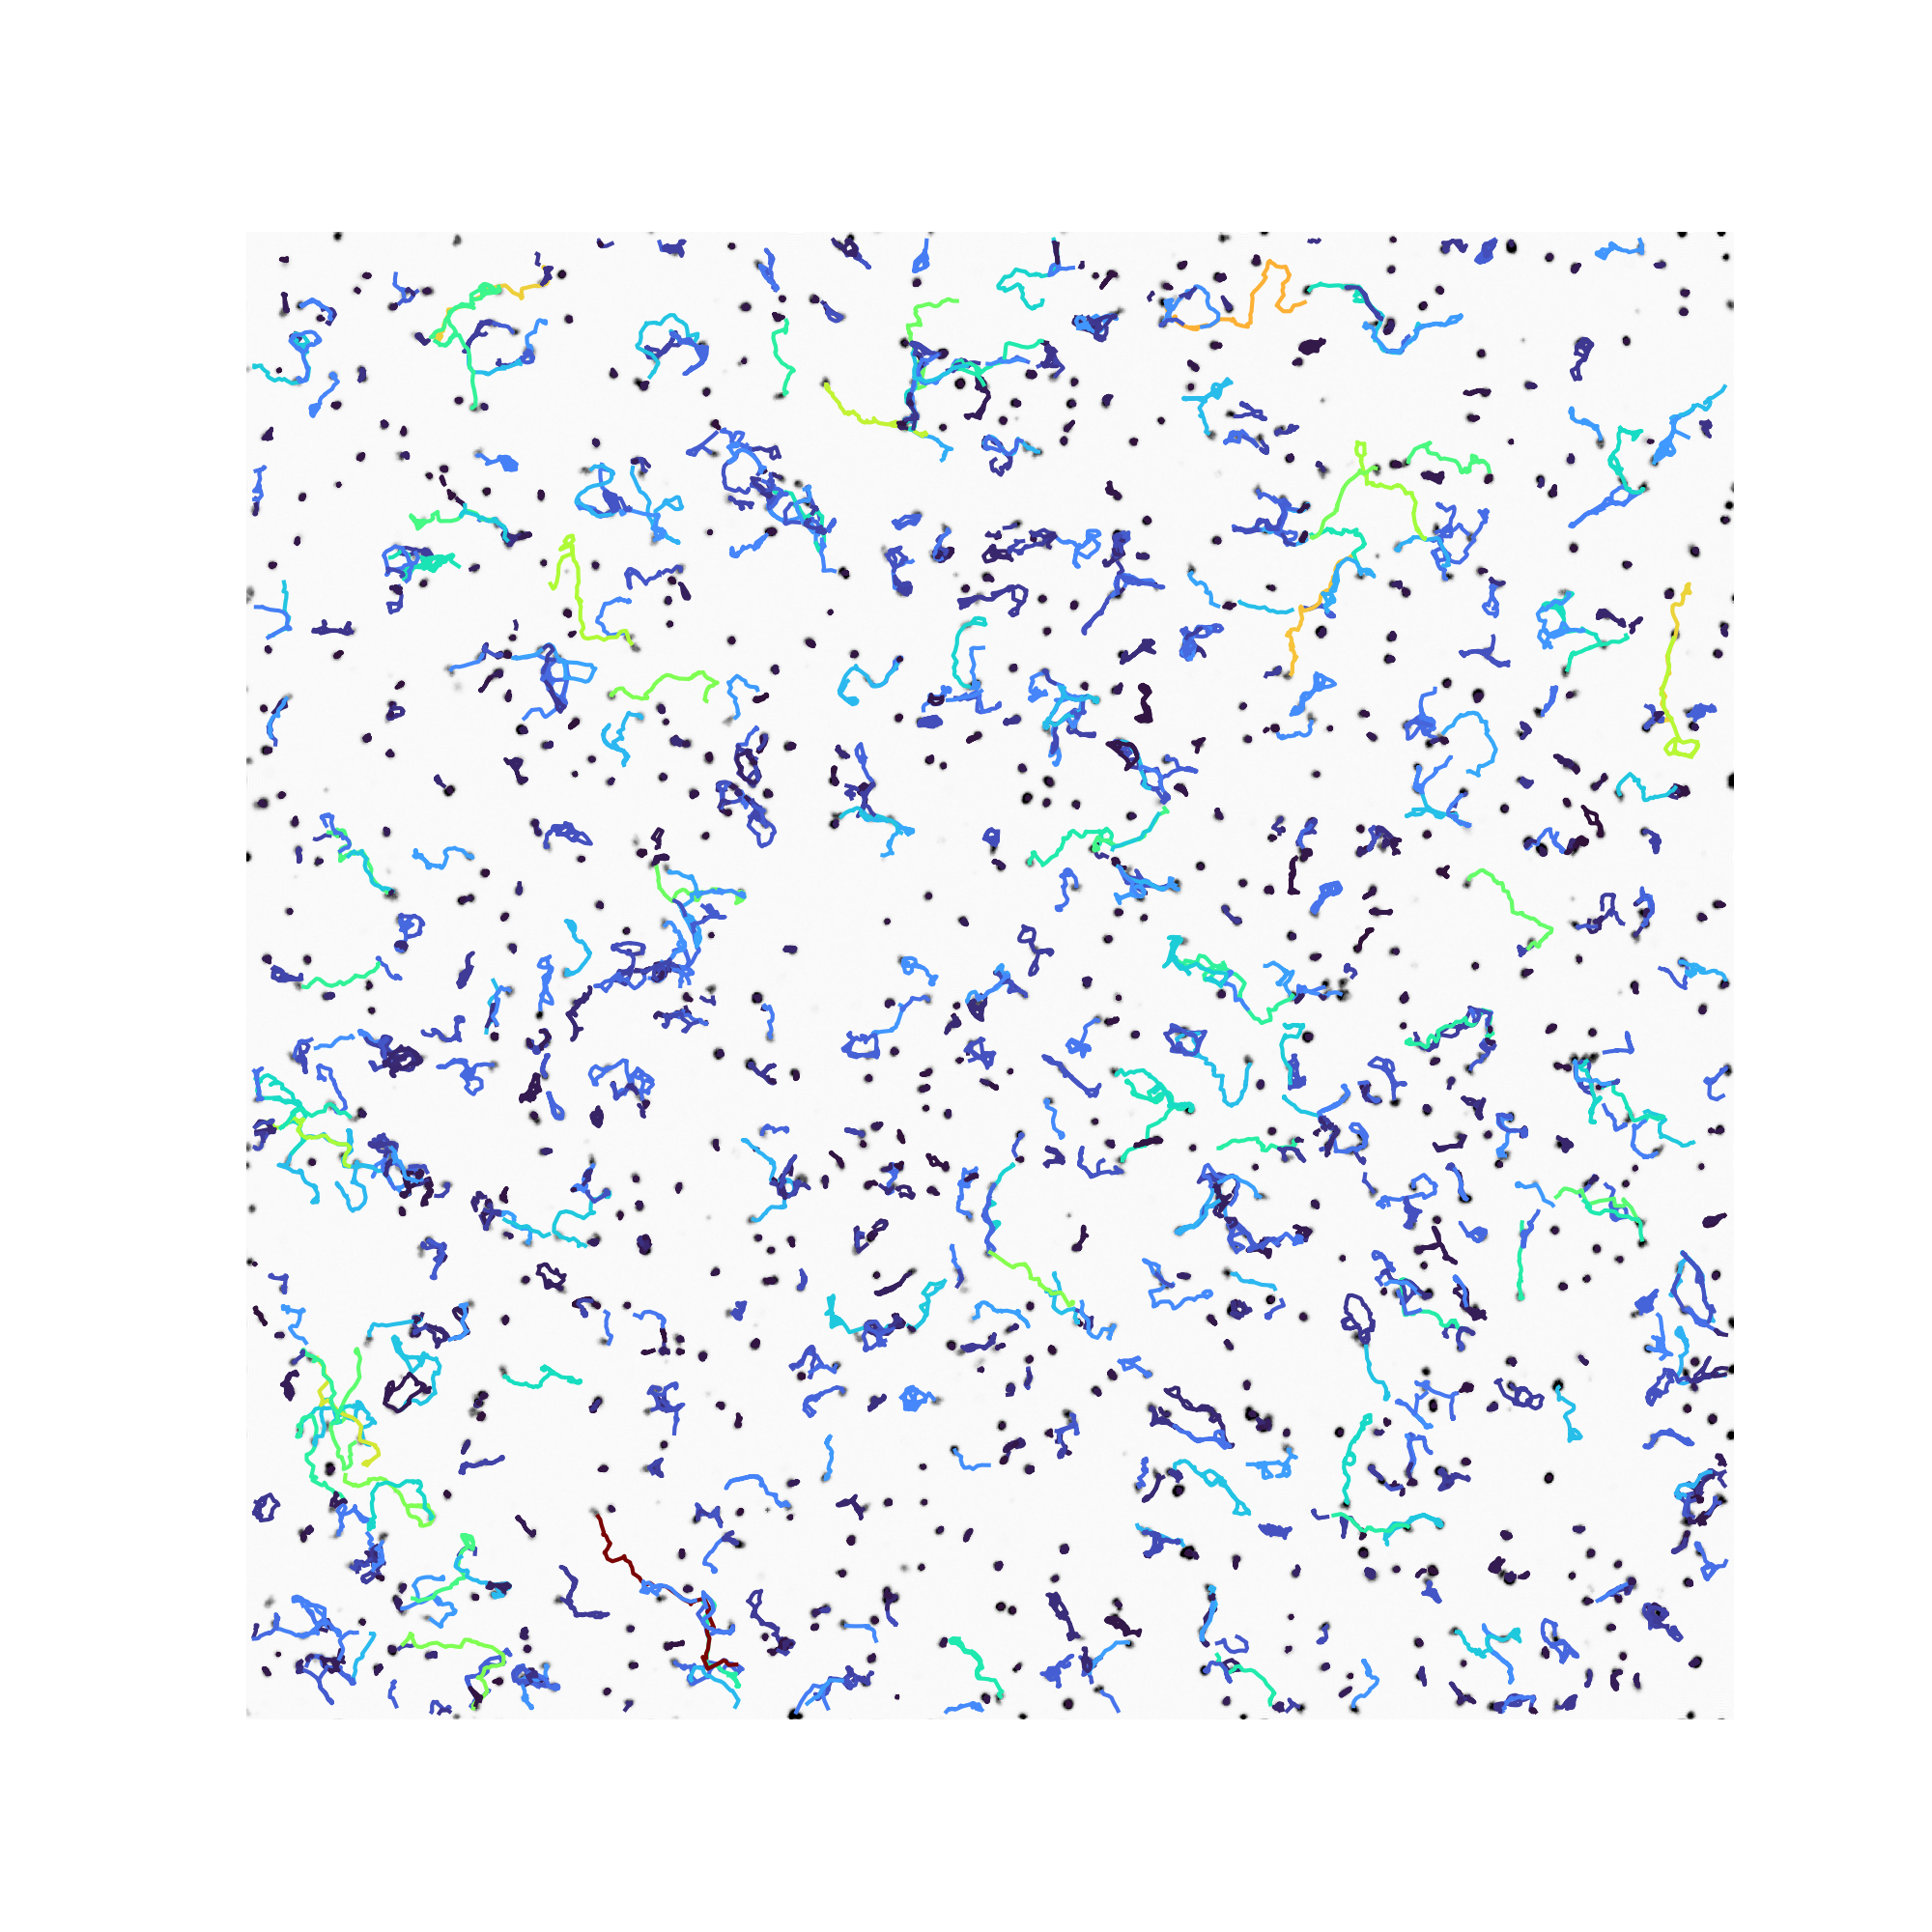

In [10]:
make_movie_with_overlays(filename, imstack, cell_trackdata_df, im_min_inten=80, im_max_inten=585, color_hue='displacement')